## **KMNIST Neural Network**
##### Author: Colten Larsen
##### Date: 02/28/2020


## **Imports**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import seaborn as sns
import sklearn.metrics as metrics

## **Check for GPU support**

In [78]:
# Check if we have GPU support
print('|--------------------------------------------|' + '\n' +
      '             Checking GPU Support' + '\n' +
      '|--------------------------------------------|')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:     " + str(device))
print("Device Name:" + str(torch.cuda.get_device_name(0)))

|--------------------------------------------|
             Checking GPU Support
|--------------------------------------------|
Device:     cuda:0
Device Name:Tesla T4


## **Create the Network**

In [79]:
# Create the Neural Network Net()
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6,
                      out_channels=16, kernel_size=5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear = nn.Sequential(
            nn.Linear(in_features=16 *
                      4 * 4, out_features=120),
            nn.ELU(),
            # nn.BatchNorm1d(120),
            nn.Linear(in_features=120, out_features=84),
            nn.ELU(),
            # nn.BatchNorm1d(84),
            nn.Linear(in_features=84, out_features=10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.reshape(-1, 16 * 4 * 4)
        x = self.linear(x)

        return x


# Set network
print('|--------------------------------------------|' + '\n' +
      '             Creating Network' + '\n' +
      '|--------------------------------------------|')
network = Net().to(device)
print(network)

|--------------------------------------------|
             Creating Network
|--------------------------------------------|
Net(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


## **Load Training and Testing Data**

In [80]:
# Global Constants (Training)
GLOBAL_BATCH_SIZE = 100
GLOBAL_CRITERION = nn.CrossEntropyLoss()
GLOBAL_OPTIMIZER = optim.Adam(network.parameters(), lr=.0025)


# load the data set (MNIST, MNIST-Fashion, KMNIST, QMNST, EMNIST)
train_set = datasets.KMNIST(
    root='/content/drive/My Drive/Colab Notebooks/MNSIT NN/data', train=True, download=True, transform=None)
test_set = datasets.KMNIST(
    root='/content/drive/My Drive/Colab Notebooks/MNSIT NN/data', train=False, download=True, transform=None)
classes = ['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

# Transform the data
train_set.transform = transforms.Compose([transforms.ToTensor()])
test_set.transform = transforms.Compose([transforms.ToTensor()])


# Load the data
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=GLOBAL_BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=GLOBAL_BATCH_SIZE, shuffle=False)


assert len(test_set) != 0, "Training Set did not load"
assert len(train_set) != 0,  "Testing Set did not load"


print('|--------------------------------------------|' + '\n' +
      '               Loading Data' + '\n' +
      '|--------------------------------------------|')
print("Length of Training Data: " + str(len(train_set)))
print("Length of Testing Data:  " + str(len(test_set)))
print('Train Loader: ' + str(train_loader))
print('Test Loader:  ' + str(test_loader))

|--------------------------------------------|
               Loading Data
|--------------------------------------------|
Length of Training Data: 60000
Length of Testing Data:  10000
Train Loader: <torch.utils.data.dataloader.DataLoader object at 0x7f43bdb255c0>
Test Loader:  <torch.utils.data.dataloader.DataLoader object at 0x7f43d6b554a8>


## **Train the model**

In [81]:
# Train the Model
print('|--------------------------------------------|' + '\n' +
      '              Started Training' + '\n' +
      '|--------------------------------------------|')

for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        GLOBAL_OPTIMIZER.zero_grad()

        outputs = network(inputs)
        loss = GLOBAL_CRITERION(outputs, labels)
        loss.backward()
        GLOBAL_OPTIMIZER.step()

        running_loss += loss.item()
        if i % 50 == 49:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

# Save the model
PATH = './model.pth'
torch.save(network.state_dict(), PATH)

print('|--------------------------------------------|' + '\n' +
      '             Finished Training' + '\n' +
      '|--------------------------------------------|')

|--------------------------------------------|
              Started Training
|--------------------------------------------|
[1,    50] loss: 1.275
[1,   100] loss: 0.612
[1,   150] loss: 0.454
[1,   200] loss: 0.397
[1,   250] loss: 0.331
[1,   300] loss: 0.265
[1,   350] loss: 0.245
[1,   400] loss: 0.228
[1,   450] loss: 0.226
[1,   500] loss: 0.191
[1,   550] loss: 0.171
[1,   600] loss: 0.172
[2,    50] loss: 0.152
[2,   100] loss: 0.153
[2,   150] loss: 0.164
[2,   200] loss: 0.153
[2,   250] loss: 0.145
[2,   300] loss: 0.154
[2,   350] loss: 0.122
[2,   400] loss: 0.117
[2,   450] loss: 0.133
[2,   500] loss: 0.124
[2,   550] loss: 0.121
[2,   600] loss: 0.111
[3,    50] loss: 0.080
[3,   100] loss: 0.088
[3,   150] loss: 0.097
[3,   200] loss: 0.108
[3,   250] loss: 0.089
[3,   300] loss: 0.089
[3,   350] loss: 0.106
[3,   400] loss: 0.101
[3,   450] loss: 0.087
[3,   500] loss: 0.090
[3,   550] loss: 0.075
[3,   600] loss: 0.121
[4,    50] loss: 0.071
[4,   100] loss: 0.066
[

## **Evaluate**

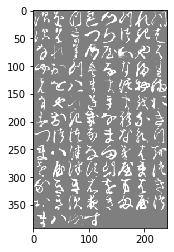


GroundTruth:     su    wo   tsu    re   tsu   tsu    re   tsu    su    ha    ma   tsu   tsu   tsu    ki    ha    na    re    ma   tsu    ya    ha    ya    ha    ya     o   tsu    ha    na    na    ma    re    ha    wo    ha    ma    ma   tsu     o    ma    na    ya    re    ki    ki    ma    wo     o    ha     o    ki    ki    na    re    na    ki   tsu   tsu   tsu    na    ma    na    re   tsu    ma    ha   tsu    na    ma    ki    ha    wo    wo    ya   tsu    su   tsu    ya    ma   tsu    na    ki    ki    ha    wo    ma    ha    ki     o    ki    su    ya    ki    ma    ya   tsu    ma    ha    wo    su
Predicted:       su    wo   tsu    re   tsu   tsu    re   tsu    ma    ha    ma   tsu   tsu   tsu    ki    ha    na    re    ma   tsu    ya    ha    ya    ha    ya     o   tsu    ha    na    na    ma    re    ha    wo    ha    ma    ma   tsu     o    ma    na    ya    re    ki    ma    ma    wo     o     o     o    ki    ya    na    re    na    ki   tsu   tsu   tsu    na    ma    na

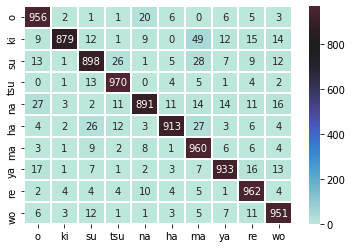

In [82]:
# Set the iterator
dataiter = iter(test_loader)
images, labels = dataiter.next()


# Imshow will take in a tensor image and output it though plt
def imshow(img):
    img = img / 2 + 0.5     # un normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Show one batch size set of images and ground truth for these images
imshow(torchvision.utils.make_grid(images))

print('\nGroundTruth: ', ' '.join('%5s' %
                                classes[labels[j]] for j in range(len(images))))

# Throw everything to the CPU for evaluation
network.to('cpu')
outputs.to('cpu')
outputs = network(images)
_, predicted = torch.max(outputs, 1)


# Print the predicted to show against the ground truth
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(len(images))))

print('\n|--------------------------------------------|' + '\n' +
      '                  Metrics' + '\n' +
      '|--------------------------------------------|')
x = []
y = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = network(images)
        _, predicted = torch.max(outputs.data, 1)

        for t, p in zip(labels.view(-1), predicted.view(-1)):
          x.append(t)
          y.append(p)


print('\n')
print("Accuracy Score:          " + str(round(100 *metrics.accuracy_score(x,y), 2)) + "%")
print("Balanced Accuracy Score: " + str(round(100 *metrics.balanced_accuracy_score(x,y), 2)) + "%")
print("Average F1 Score :       " + str(round(100 * metrics.f1_score(x,y,average='macro'), 2)) + '%')
print("Average Precision Score: " + str(round(100 * metrics.precision_score(x,y,average='macro'), 2)) + '%')
print("Average Recall Score:    " + str(round(100 * metrics.recall_score(x,y,average='macro'), 2)) + '%')
print('\n')
mix = metrics.confusion_matrix(x,y)
ax = sns.heatmap(mix, annot=True, fmt="d", annot_kws={"size": 10}, linewidths=1, xticklabels=classes, yticklabels=classes, center= 800)

### **More Metrics**

In [83]:
print('|--------------------------------------------|' + '\n' +
      '               More Metrics' + '\n' +
      '|--------------------------------------------|')

# all_f1 = np.asarray(metrics.f1_score(x,y,average=None))
# all_prec = np.asarray(metrics.precision_score(x,y,average=None))
# all_recall = np.asarray(metrics.recall_score(x,y,average=None))
# all_acc = np.asarray(mix.diag()/confusion_matrix.sum(1))

print(metrics.classification_report(x, y, target_names=classes))

'''print('\n') 
for i in range(len(classes)):
  print('F1 of ' + classes[i] + ': ' + str(round(100 * all_f1[i], 2)) + '%')

print('\n') 
for i in range(len(classes)):
  print('Recall of ' + classes[i] + ': ' + str(round(100 * all_recall[i], 2)) + '%')
  
print('\n') 
for i in range(len(classes)):
  print('Precision of ' + classes[i] + ': ' + str(round(100 * all_prec[i], 2)) + '%')'''

|--------------------------------------------|
               More Metrics
|--------------------------------------------|
              precision    recall  f1-score   support

           o       0.92      0.96      0.94      1000
          ki       0.98      0.88      0.93      1000
          su       0.91      0.90      0.91      1000
         tsu       0.94      0.97      0.96      1000
          na       0.94      0.89      0.92      1000
          ha       0.96      0.91      0.94      1000
          ma       0.87      0.96      0.91      1000
          ya       0.94      0.93      0.94      1000
          re       0.92      0.96      0.94      1000
          wo       0.93      0.95      0.94      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



"print('\n') \nfor i in range(len(classes)):\n  print('F1 of ' + classes[i] + ': ' + str(round(100 * all_f1[i], 2)) + '%')\n\nprint('\n') \nfor i in range(len(classes)):\n  print('Recall of ' + classes[i] + ': ' + str(round(100 * all_recall[i], 2)) + '%')\n  \nprint('\n') \nfor i in range(len(classes)):\n  print('Precision of ' + classes[i] + ': ' + str(round(100 * all_prec[i], 2)) + '%')"